Muhammad Aizar Yazid / 1103223097

# Import Libraries

In [2]:
!pip install tensorflow.keras
!pip install keras_tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import keras_tuner as kt

# Mengatur agar plot terlihat lebih baik
plt.style.use('seaborn-v0_8-whitegrid')

# Data Preparation

In [4]:
# --- Parameter Awal ---
VOCAB_SIZE = 10000  # Jumlah kata unik yang akan kita gunakan
MAX_LEN = 256       # Panjang maksimum setiap ulasan (dipotong atau di-padding)
BATCH_SIZE = 128    # Jumlah sampel yang diproses sebelum model diupdate

# --- Memuat Data ---
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)

print(f"Jumlah data training: {len(train_data)}")
print(f"Jumlah data testing: {len(test_data)}")

# --- Padding Data ---
# Membuat semua sekuens (ulasan) memiliki panjang yang sama
train_data_padded = pad_sequences(train_data, maxlen=MAX_LEN, padding='post', truncating='post')
test_data_padded = pad_sequences(test_data, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"Bentuk data training setelah padding: {train_data_padded.shape}")
print(f"Bentuk data testing setelah padding: {test_data_padded.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Jumlah data training: 25000
Jumlah data testing: 25000
Bentuk data training setelah padding: (25000, 256)
Bentuk data testing setelah padding: (25000, 256)


# Model Preparation

In [5]:
# --- Membangun Model ---
model = Sequential([
    # 1. Lapisan Embedding
    Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=MAX_LEN),

    # 2. Lapisan Bidirectional LSTM
    Bidirectional(LSTM(64, return_sequences=False)), # return_sequences=False karena lapisan selanjutnya adalah Dense

    # 3. Lapisan Dropout untuk regularisasi
    Dropout(0.5),

    # 4. Lapisan Output
    Dense(1, activation='sigmoid') # Sigmoid untuk klasifikasi biner (0 atau 1)
])

# --- Kompilasi Model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# --- Melatih Model ---
print("\n--- Memulai Pelatihan Model Awal ---")
history = model.fit(
    train_data_padded,
    train_labels,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_split=0.2 # Menggunakan 20% data training untuk validasi
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Memulai Pelatihan Model Awal ---
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6214 - loss: 0.6285 - val_accuracy: 0.8386 - val_loss: 0.4002
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8683 - loss: 0.3381 - val_accuracy: 0.8606 - val_loss: 0.3439
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9201 - loss: 0.2250 - val_accuracy: 0.8456 - val_loss: 0.3656
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9005 - loss: 0.2571 - val_accuracy: 0.8462 - val_loss: 0.3879
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9481 - loss: 0.1531 - val_accuracy: 0.8648 - val_loss: 0.4570
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9667 - loss: 0.1042 - val_accuracy: 0.8576 - val_loss: 0.4491
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9669 - loss: 0.1021 - val_accuracy: 0.8566 - val_loss: 0.5380
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - acc

# Evaluation and Visualization

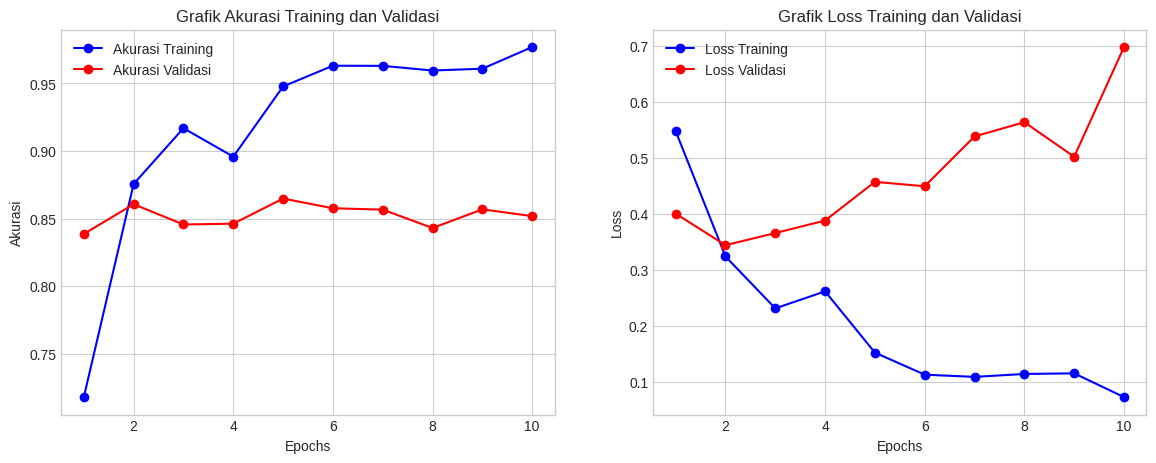

In [6]:
# --- Fungsi untuk plot grafik ---
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Akurasi Training')
    plt.plot(epochs, val_acc, 'ro-', label='Akurasi Validasi')
    plt.title('Grafik Akurasi Training dan Validasi')
    plt.xlabel('Epochs')
    plt.ylabel('Akurasi')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Loss Training')
    plt.plot(epochs, val_loss, 'ro-', label='Loss Validasi')
    plt.title('Grafik Loss Training dan Validasi')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# --- Panggil fungsi plot ---
plot_history(history)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step

--- Metrik Evaluasi Model Awal pada Test Set ---
Akurasi : 0.8350
Presisi : 0.8061
Recall  : 0.8822
F1-Score: 0.8424
AUC     : 0.9011


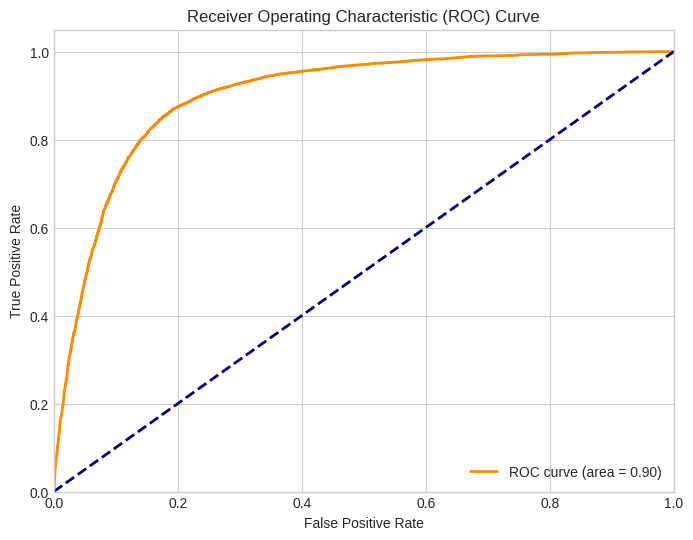

In [7]:
# --- Evaluasi pada Test Set ---
# Dapatkan probabilitas prediksi dari model
y_pred_proba = model.predict(test_data_padded).ravel()
# Ubah probabilitas menjadi kelas (0 atau 1) dengan ambang batas 0.5
y_pred_class = (y_pred_proba > 0.5).astype(int)

# --- Hitung Metrik ---
accuracy = accuracy_score(test_labels, y_pred_class)
precision = precision_score(test_labels, y_pred_class)
recall = recall_score(test_labels, y_pred_class)
f1 = f1_score(test_labels, y_pred_class)
roc_auc = roc_auc_score(test_labels, y_pred_proba)

print("\n--- Metrik Evaluasi Model Awal pada Test Set ---")
print(f"Akurasi : {accuracy:.4f}")
print(f"Presisi : {precision:.4f}")
print(f"Recall  : {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC     : {roc_auc:.4f}")

# --- Visualisasi ROC Curve ---
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning

In [10]:
# --- Fungsi untuk membangun model (diperlukan oleh Keras Tuner) ---
def build_model_for_tuner(hp):
    model = Sequential()

    # Tuning dimensi embedding
    hp_embedding_dim = hp.Int('embedding_dim', min_value=64, max_value=256, step=64)
    model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=hp_embedding_dim, input_length=MAX_LEN))

    # Tuning unit LSTM
    hp_lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    model.add(Bidirectional(LSTM(hp_lstm_units)))

    # Tuning laju dropout
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    # Tuning learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# --- Inisialisasi Tuner ---
# Kita gunakan RandomSearch, yang lebih cepat dari GridSearchCV
tuner = kt.RandomSearch(
    build_model_for_tuner,
    objective='val_accuracy', # Tujuan kita: memaksimalkan akurasi validasi
    max_trials=10, # Jumlah kombinasi hyperparameter yang akan dicoba
    executions_per_trial=1, # Berapa kali melatih setiap kombinasi
    directory='my_dir',
    project_name='imdb_sentiment'
)

# --- Mulai Pencarian ---
print("\n--- Memulai Pencarian Hyperparameter ---")
# Kita gunakan subset data agar pencarian lebih cepat
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(
    train_data_padded,
    train_labels,
    epochs=10,
    validation_split=0.2,
    callbacks=[stop_early]
)

# --- Dapatkan Hyperparameter Terbaik ---
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Pencarian Selesai. Hyperparameter terbaik adalah:
- Dimensi Embedding: {best_hps.get('embedding_dim')}
- Unit LSTM: {best_hps.get('lstm_units')}
- Dropout Rate: {best_hps.get('dropout_rate'):.2f}
- Learning Rate: {best_hps.get('learning_rate')}
""")

Trial 10 Complete [00h 02m 27s]
val_accuracy: 0.8619999885559082

Best val_accuracy So Far: 0.8809999823570251
Total elapsed time: 00h 18m 03s

Pencarian Selesai. Hyperparameter terbaik adalah:
- Dimensi Embedding: 192
- Unit LSTM: 96
- Dropout Rate: 0.20
- Learning Rate: 0.001



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Memulai Pelatihan Model Final dengan Hyperparameter Terbaik ---
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.6507 - loss: 0.6021 - val_accuracy: 0.8247 - val_loss: 0.4369
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.8493 - loss: 0.3737 - val_accuracy: 0.8465 - val_loss: 0.3752
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9043 - loss: 0.2548 - val_accuracy: 0.8400 - val_loss: 0.3715
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9315 - loss: 0.1947 - val_accuracy: 0.8294 - val_loss: 0.4908
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9490 - loss: 0.1482 - val_accuracy: 0.8460 - val_loss: 0.4183
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9618 - loss: 0.1149 - val_accuracy: 0.8332 - val_loss: 0.5441


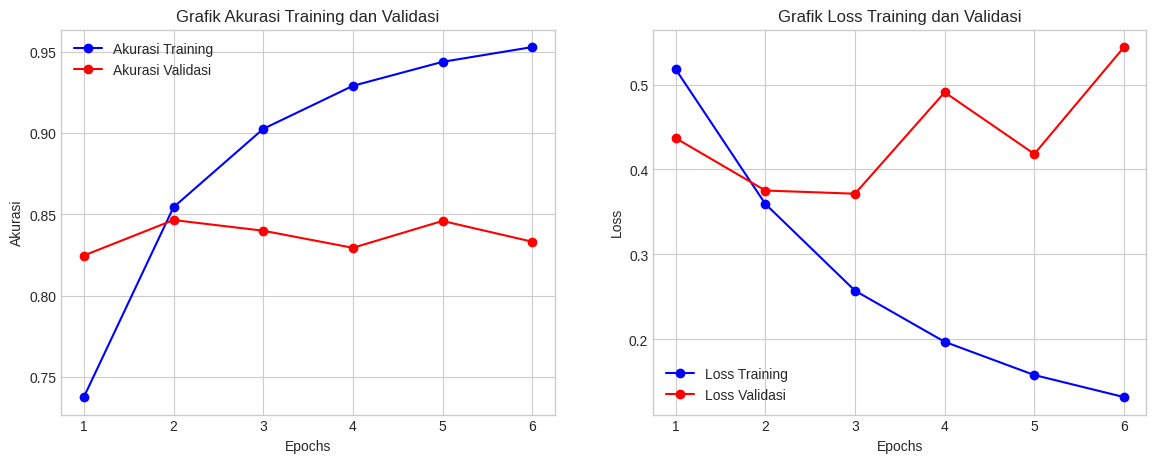

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8350 - loss: 0.5386

--- Hasil Evaluasi Model Final pada Test Set ---
Loss    : 0.5441
Akurasi : 0.8332 (83.32%)


In [11]:
# --- Membangun model final dengan hyperparameter terbaik ---
final_model = tuner.hypermodel.build(best_hps)
final_model.summary()

# --- Melatih model final ---
print("\n--- Memulai Pelatihan Model Final dengan Hyperparameter Terbaik ---")
history_final = final_model.fit(
    train_data_padded,
    train_labels,
    epochs=10, # Latih sedikit lebih lama jika perlu
    batch_size=BATCH_SIZE,
    validation_data=(test_data_padded, test_labels), # Langsung validasi di test set
    callbacks=[stop_early] # Gunakan early stopping untuk mencegah overfitting
)

# --- Visualisasi Hasil Akhir ---
plot_history(history_final)

# --- Evaluasi Akhir pada Test Set ---
loss, accuracy = final_model.evaluate(test_data_padded, test_labels)
print(f"\n--- Hasil Evaluasi Model Final pada Test Set ---")
print(f"Loss    : {loss:.4f}")
print(f"Akurasi : {accuracy:.4f} ({accuracy*100:.2f}%)")